In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)
import gmplot
import matplotlib.image as mpimg
%matplotlib inline

In [9]:
df = pd.read_csv("part3_data.csv")

In [10]:
df.describe()

,dates,latitude,longitude,quant1,quant2,quant3
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.467361e+09,1.026321,-0.082380,1.737077,0.031580,4980.333493
std,9.141892e+06,51.545570,103.546299,1.012192,17.456411,2889.413452
min,1.451612e+09,-89.995631,-179.756945,0.001356,-29.979777,0.723583
25%,1.459531e+09,-43.319612,-89.584439,0.854677,-15.223848,2490.176566
50%,1.467432e+09,1.219217,0.070930,1.726674,-0.234758,4920.907779
75%,1.475310e+09,46.321107,88.911360,2.618524,15.397590,7499.437028
max,1.483138e+09,89.974703,179.946696,3.499813,29.994035,9999.376454


In [11]:
df.mean()

dates        1.467361e+09
latitude     1.026321e+00
longitude   -8.238017e-02
quant1       1.737077e+00
quant2       3.157957e-02
quant3       4.980333e+03
dtype: float64

In [17]:
df.head(5)

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1.453009e+09,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
1,b'Eurma',1.471779e+09,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725
2,b'Taleia',1.473613e+09,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225
3,b'Niley',1.481194e+09,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647
4,b'Acey',1.454403e+09,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324


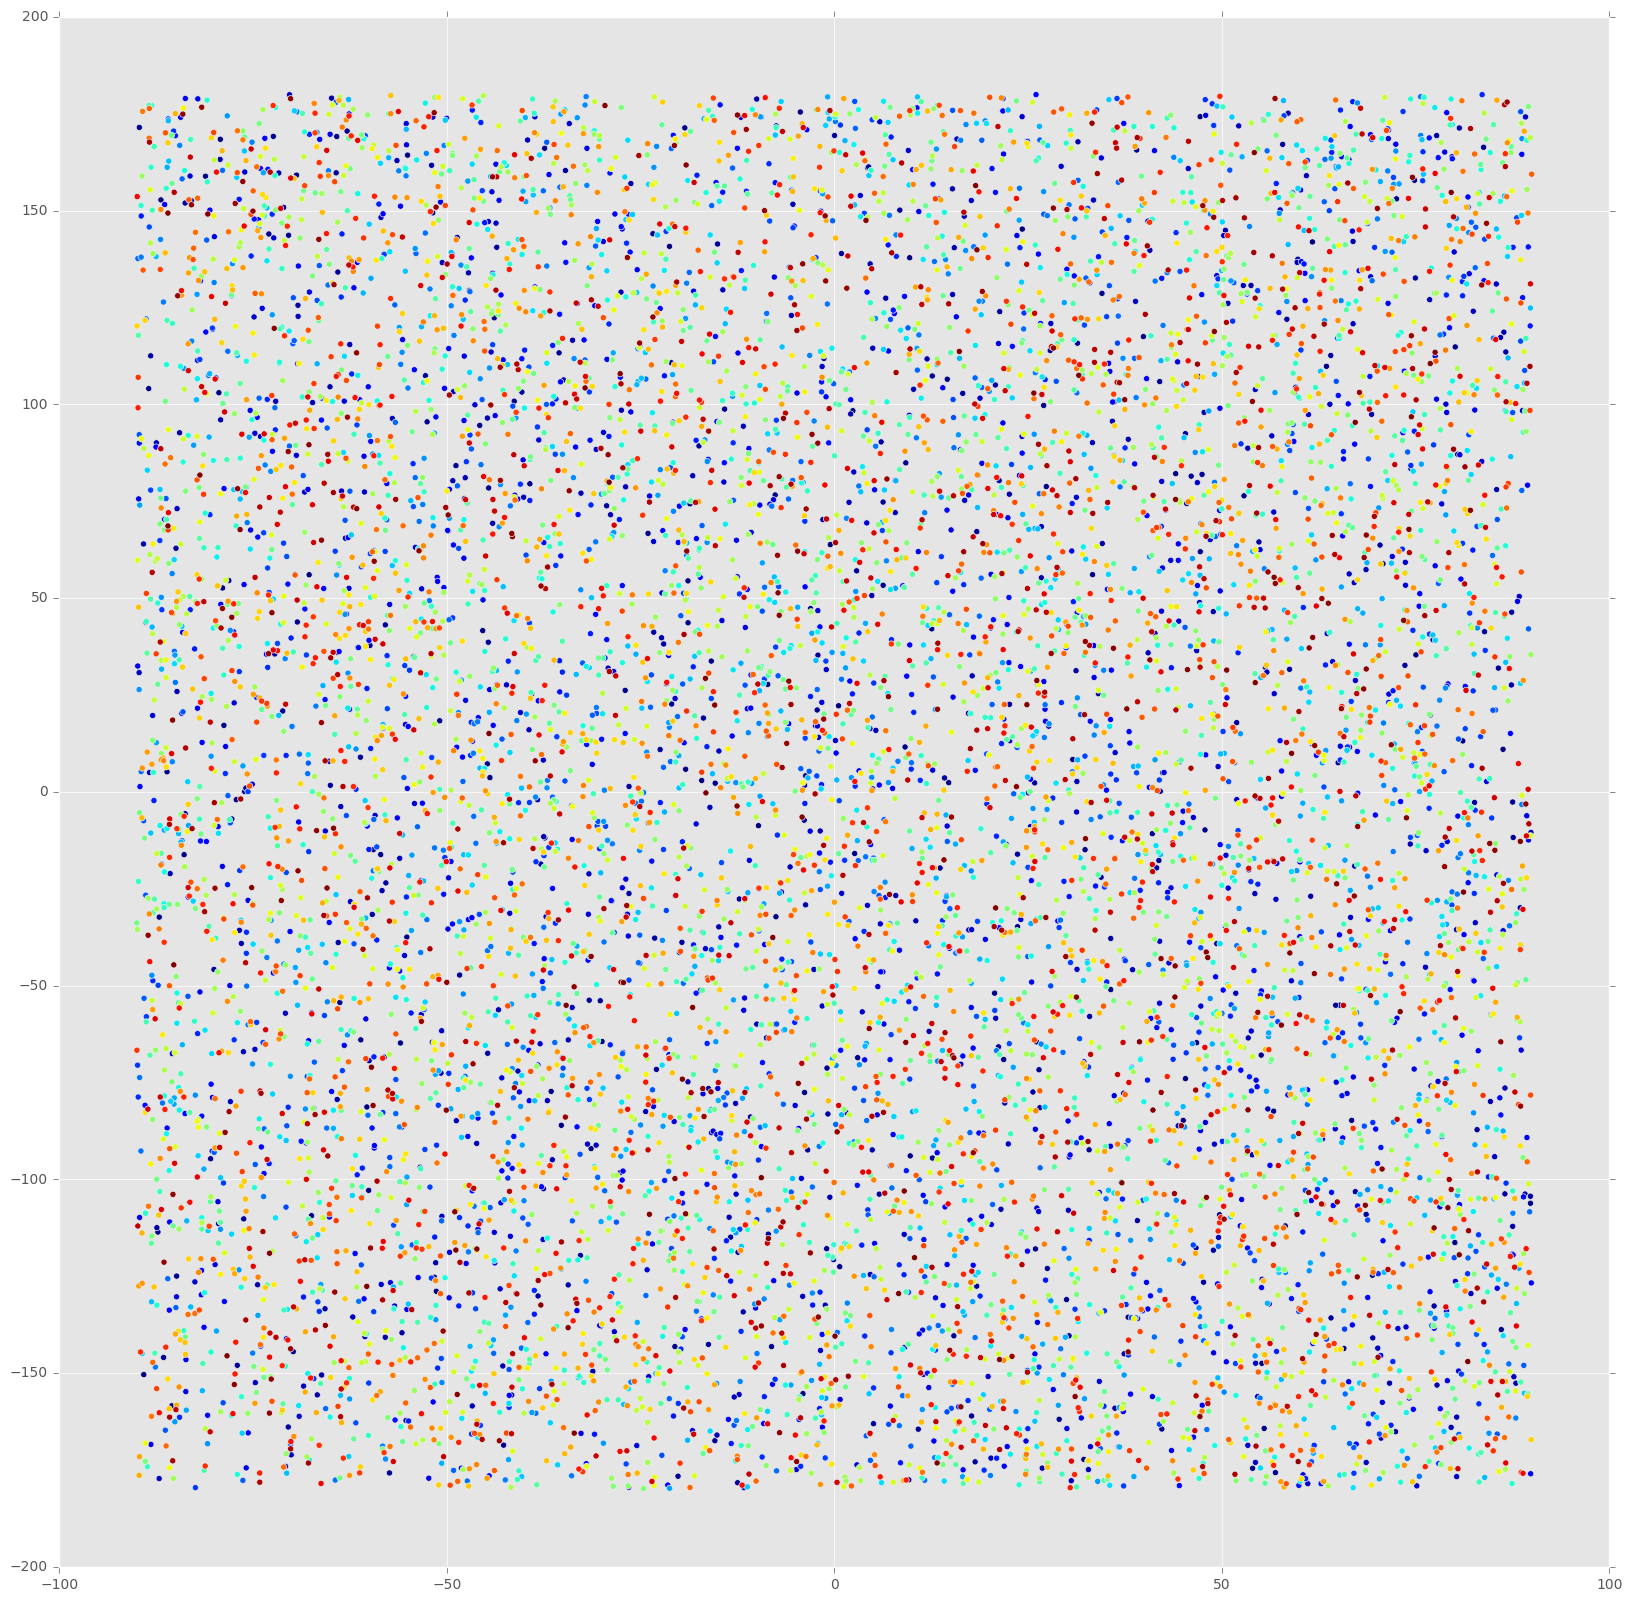

In [76]:
plt.scatter(df.latitude, df.longitude,c=np.arange(len(df.latitude)))
plt.rcParams['figure.figsize'] = (20, 20)

In [40]:
gmap = gmplot.GoogleMapPlotter(40.088, -88.281, 16)
# Scatter plot on Google Map
gmap.scatter(df["latitude"],df["longitude"], size=40, marker=False)
gmap.draw("scatter.html")
#Heatmap on Google Map
gmap.scatter(df["latitude"],df["longitude"], size=40, marker=False)
gmap.draw("heatmap.html")

In [21]:
cat_uniq = df.categorical.unique()
quants = ['quant1', 'quant2', 'quant3']

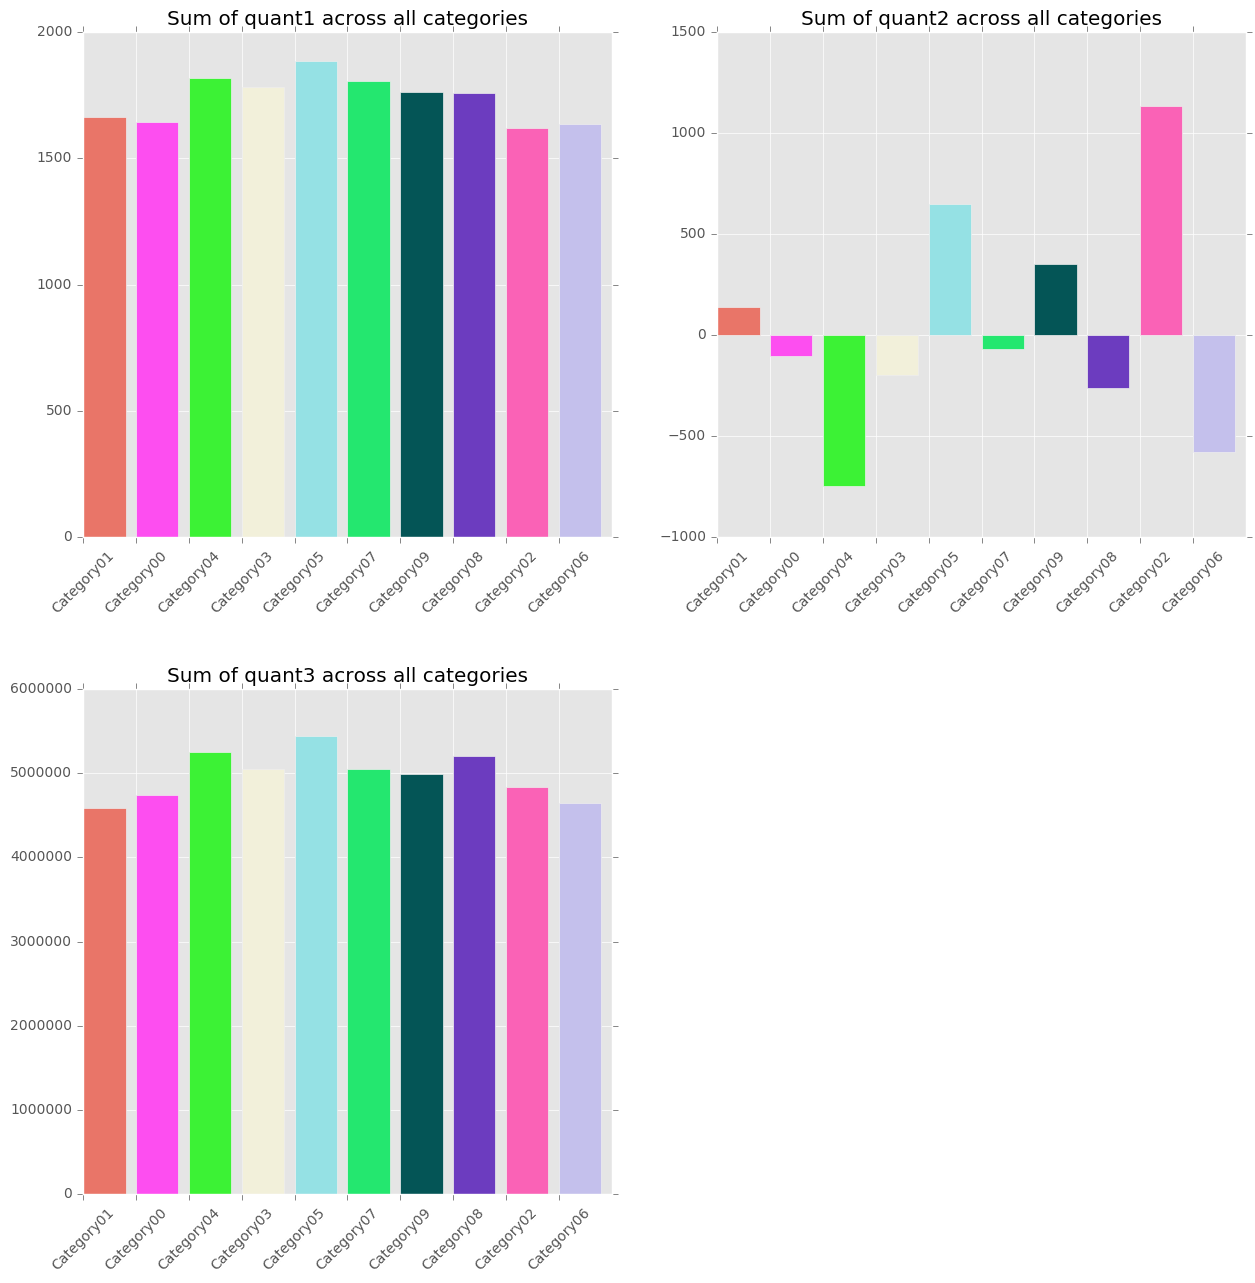

In [86]:
color=np.random.rand(10,3)
for i in range(1,4):
    plt.subplot(2,2,i)    
    plt.bar(np.arange(len(cat_uniq)), df.groupby('categorical').sum()[quants[i-1]], color=color)
    plt.xticks(np.arange(len(cat_uniq)), cat_uniq, rotation = 45)
    plt.title("Sum of "+ quants[i-1] + " across all categories")
    
plt.subplots_adjust(wspace=.2, hspace=.3)
plt.rcParams['figure.figsize'] = (15,15)

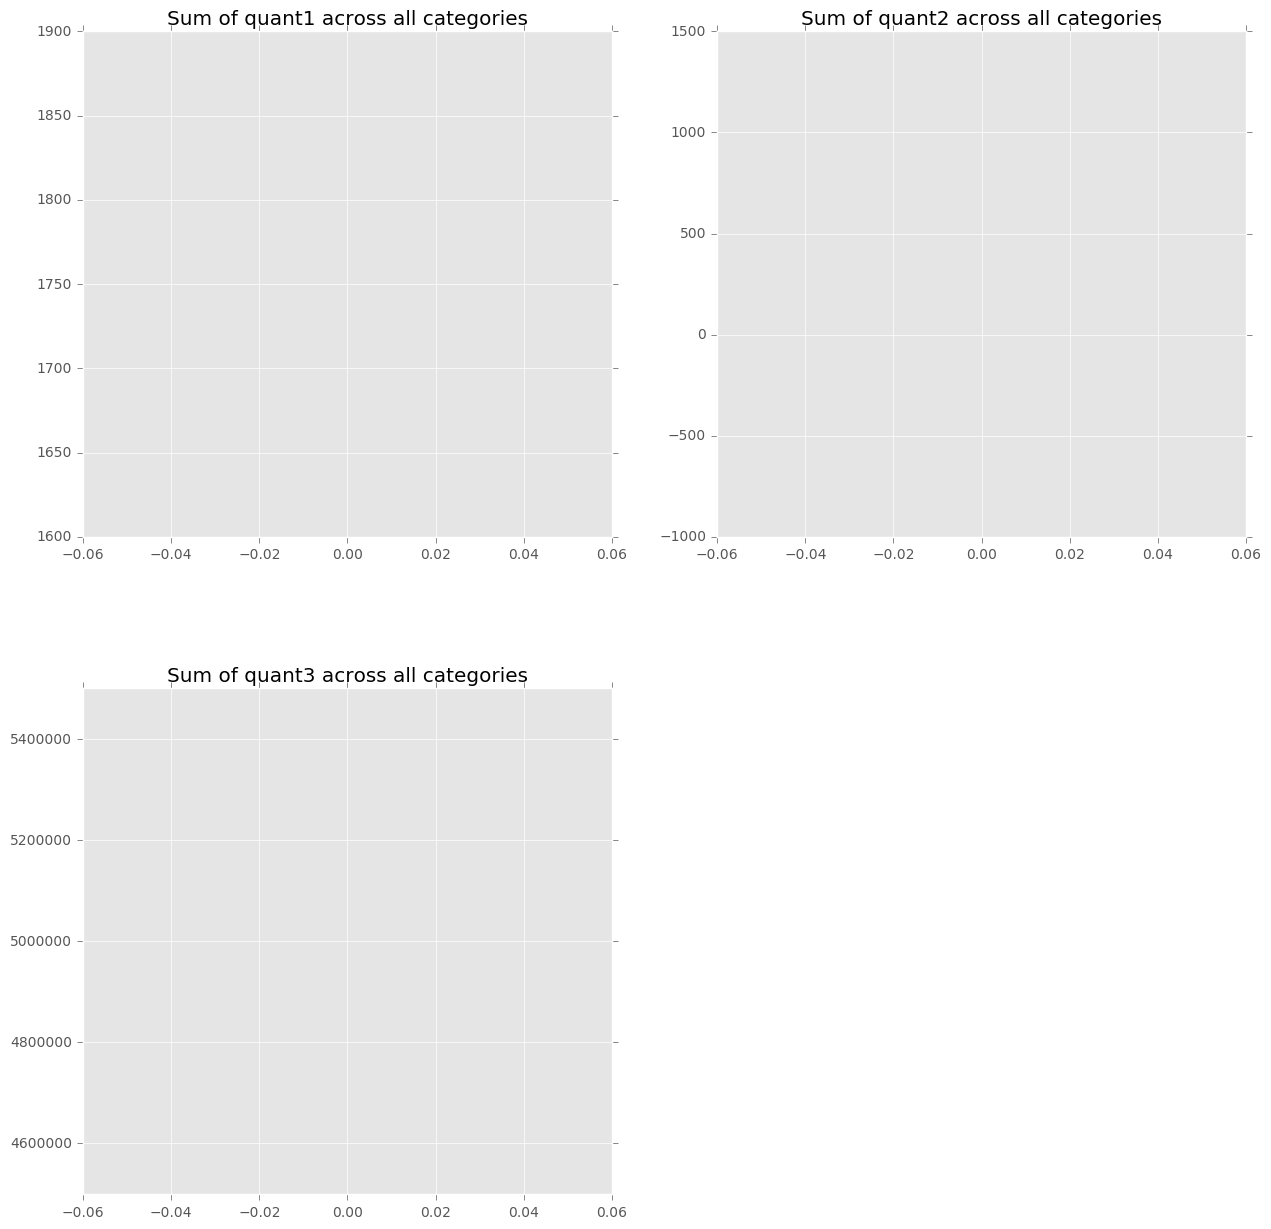

In [93]:
for i in range(1,4):
    plt.subplot(2,2,i)
    for j in range(10):
        plt.plot(df.groupby('categorical').sum()[quants[i-1]][j],'-')
    #plt.xticks(np.arange(len(cat_uniq)), cat_uniq, rotation = 45)
    plt.title("Sum of "+ quants[i-1] + " across all categories")
plt.subplots_adjust(wspace=.2, hspace=.3)
plt.rcParams['figure.figsize'] = (15,15)

In [89]:
df.groupby('categorical').sum()[quants[i-1]][0]

1662.0788234737154